# 08-1

# 합성곱 신경망
합성곱 층을 1개 이상 사용한 인공신경망

# 합성곱

입력 개수만큼의 가중치를 갖는 게 아닌 하이퍼파라미터로 정해진 가중치 만큼을 갖고 일부 특성에 차례로 적용하는 방식
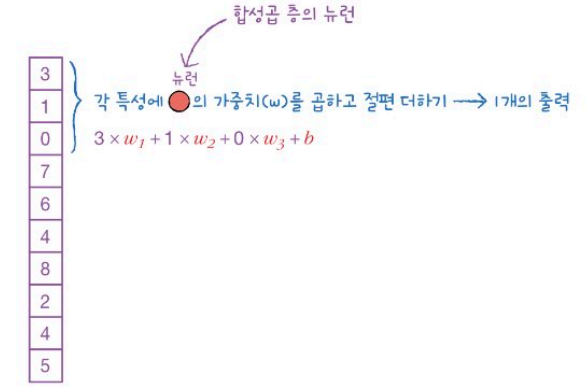
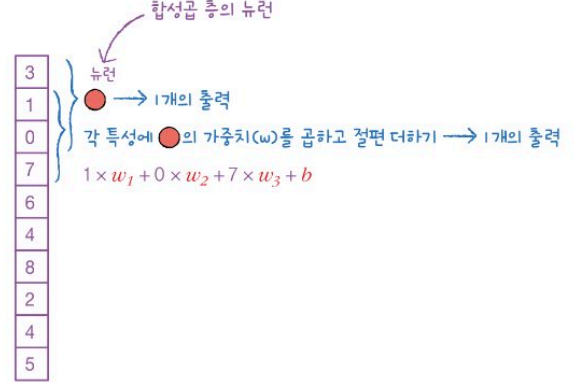

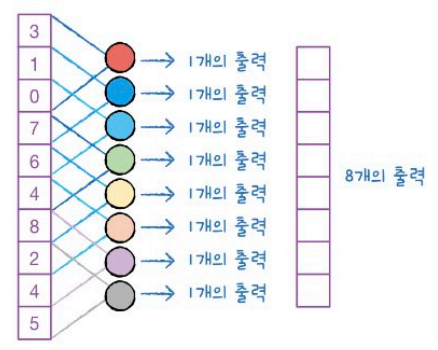

- 모두 같은  가중치 w1 ~ w3과 절편을 사용
- 10개의 특성에 3개의 가중치를 갖는 뉴런(=필터, 커널) 을 적용하여 8개의 출력 생성
- 커널 : 입력에 곱하는 가중치 표현
- 필터 : 뉴런 개수 표현

**입력이 2차원 배열일 때**

- 필터도 2차원이어야 함
- 왼쪽 위 부터 시작하여 오른쪽으로 이동, 더 이상 이동할 수 없으면 아래로 한 칸 이동한 다음 다시 왼쪽부터 시작

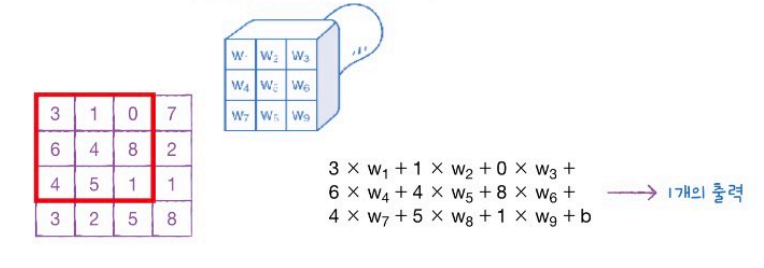
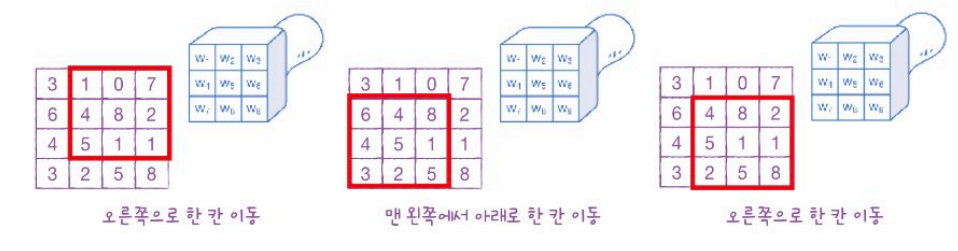

**특성맵**

- 4개의 출력을 2차원으로 배치 -> 특성맵
- (4,4) -> (2,2)
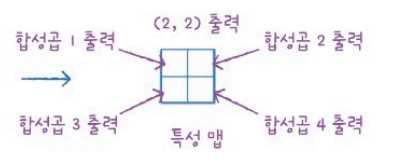

여러 개의 필터(= 7장에서의 뉴런)사용

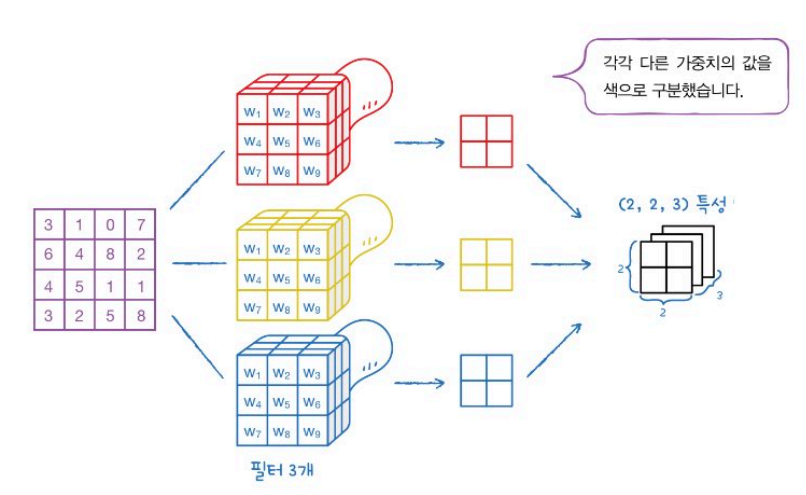

- (2,2) 크기의 필터 3개 사용 -> (2,2,3)크기의 3차원 배열
- 2차원의 형태 유지 -> 이미지 처리 분야에 뛰어

**케라스 합성곱 층**
- keras.layers 의 Conv2D클래스
- 매개변수 : (필터개수, 커널 크기, 활성화 함수, 패딩, 스트라이드)

*일반적으로 특성 맵은 활성화 함수 적용 후

*보통 커널 크기 (3,3), (5,5) 크기로 지정

*패딩 default = 'valid' (패딩 하지 않는 것)

*스트라이드 dafault = 1

**패딩**

특성 맵의 크기를 입력과 비슷한 정도 키우기 위해 입력 배열의 주위에 가상원소 0으로 채우는 것

- 0으로 패딩하여 계산에 영향을 주지 않음

**세임 패딩**
입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위에 0으로 패딩하는 것

**밸리드 패딩**
패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 것 -> 특성 맵 크기 줄어듬

 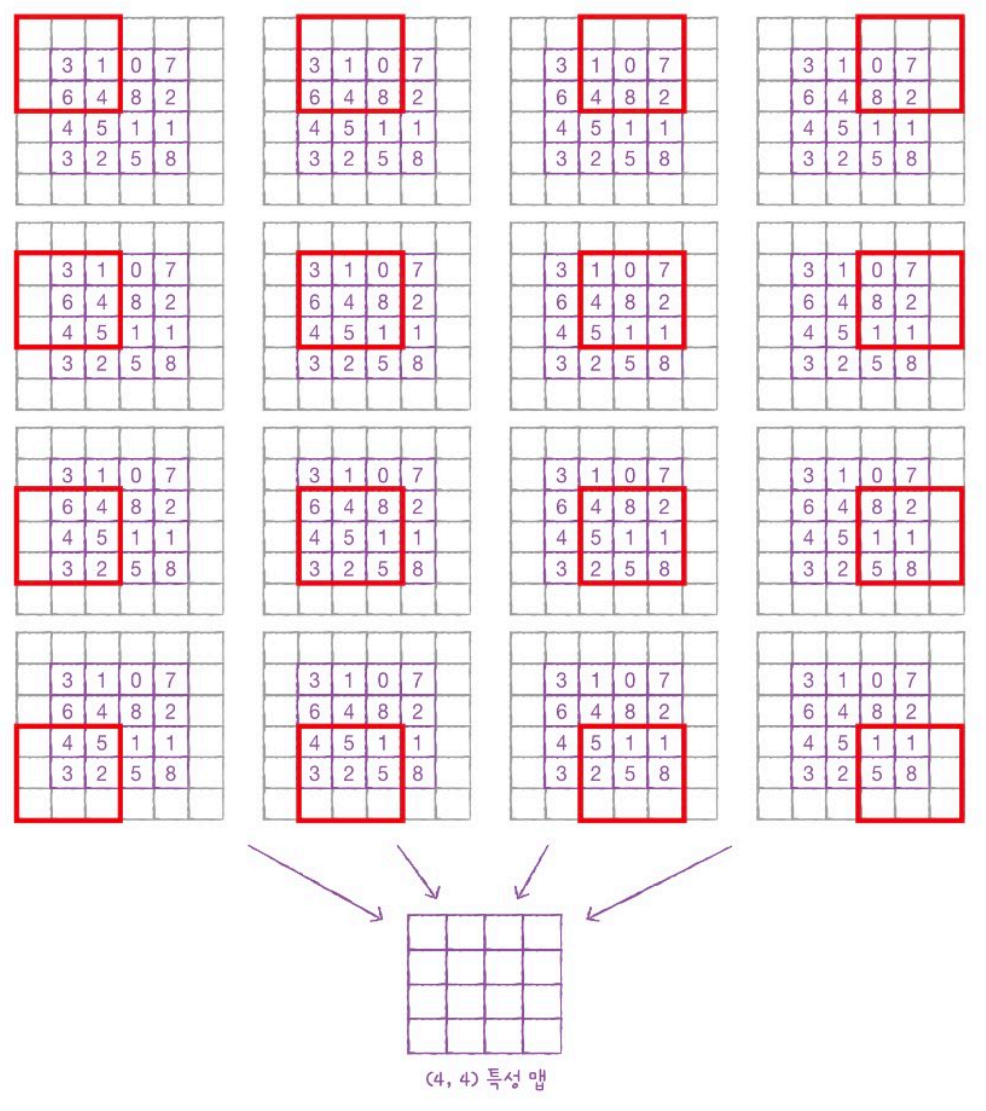

왜 패딩을 즐겨 할까?

1. 특성맵의 크기를 입력값과 동일하게 만들 수 있음
2. 모서리쪽 정보와 가운데 정보가 계산되는 횟수를 비슷하게 만들어 이미지 주변에 있는 정보를 잃어버리지 않게 함

ex) (3,3) valid padding
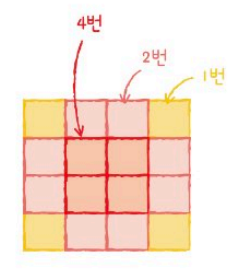

ex) (3,3) 1 pixel padding
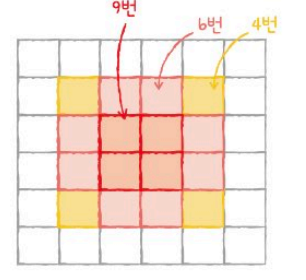

4:1 -> 9:4

Q. 특성맵이 입력값의 크기와 동일하면 좋은 점?

**스트라이드**

필터가 이동하는 칸의 개수

- (오른쪽 이동 크기, 아래쪽 이동 크기) 형태의 튜플로 지정 가능
- 커널이 찍히는 횟수가 줄어들어 특성맵의 크기는 작아짐

Q. 스트라이드 왜 사용? 특성맵 크기도 작아지는데

**풀링**

합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄임, 특성맵의 개수는 변화 X

- 풀링에는 가중치가 없으며 최댓값 또는 평균값 계산
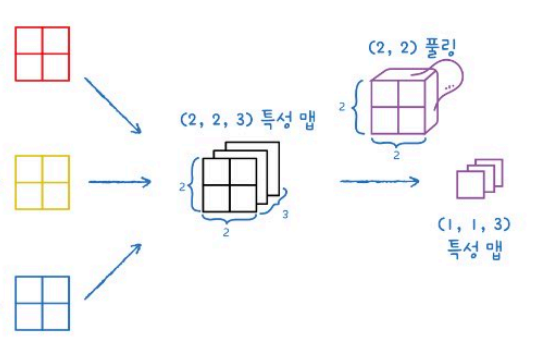

(2,2,3) -> (1,1,3)

**최대 풀링(max pooling)**

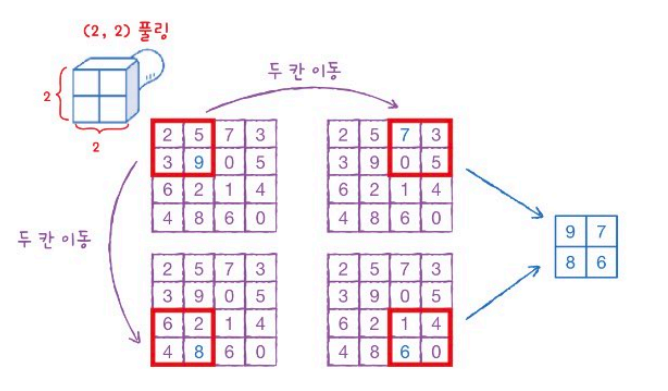

- 합성곱과 달리 풀링 영역이 풀링의 크기만큼 이동
>(2,2) 풀링 -> 스트라이드 2

  >(3,3) 풀링 -> 스트라이드 3


**평균 풀링(average pooling)**

- 특성 맵의 중요한 정보를 희석할 수 있으므로 최대풀링 호

**케라스의 풀링층**

- maxpooling) keras.layers의 MaxPooling2D
- 매개변수 : (풀링 크기, 스트라이드, 패딩)

*스트라이드 default : 풀링 크기
*패딩 dault : valid (하지 않음)

*위 두 매개변수 거의 번경 X

** 합성곱 신경망의 전체 구조**

1. 입력에 패딩 추가
> (4,4) 입력, 세임패딩, 풀링 크기가 (3,3)이므로 1pixel 추가

2. 합성곱 수행
> 필터 3개(각각 절편 존재, 활성화 함수 적용), 스트라이드 1

3. 특성 맵 생성
>(4,4,3) 크기의 특성 맵

4. 풀링 층으로 특성 맵 크기 감소(개수 유지)
>(2,2)풀링으로 크기 절반으로 감소

5. 3차원 배열을 1차원으로 펼침(Flatten클래스)
>(2,2,3) -> 12개의 원소

6. 클래스 수 만큼의 뉴런을 가지는 출력층 통과
> 출력층의 뉴런 수 3개, 소프트맥스 통과

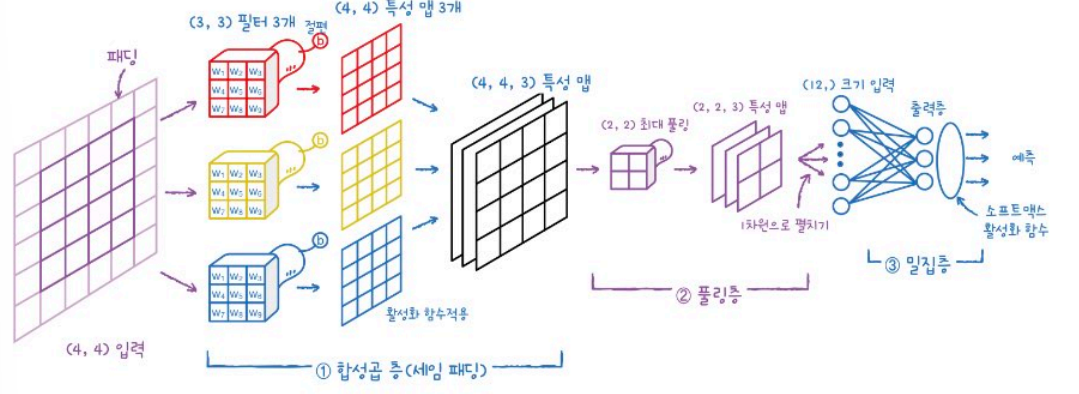


**컬러 이미지를 사용한 합성곱**

흑백은 2차원으로 표현 가능하지만 컬러 이미지는 R,G,B 세 채널로 구성되어 3차원 배열로 표현해야 함

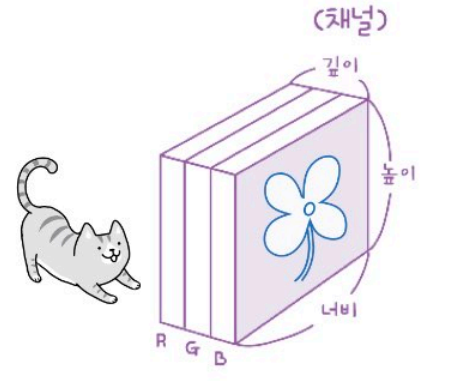

- 입력이나 필터의 차원에 상관없이 특성맵의 한 원소는 하나의 값을 가짐

- 커널 깊이를 입력의 깊이와 같게 설정



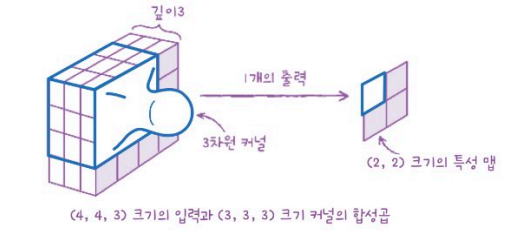

- 입력층이 컬러인 경우와 비슷하게 합성곱 층 - 풀링 층 다음에 다시 합성곱 층이 올 경우 위와 비슷하게 실행

ex) 특성 맵 (4,4,5), 커널크기(3,3,5), 필터 개수 10
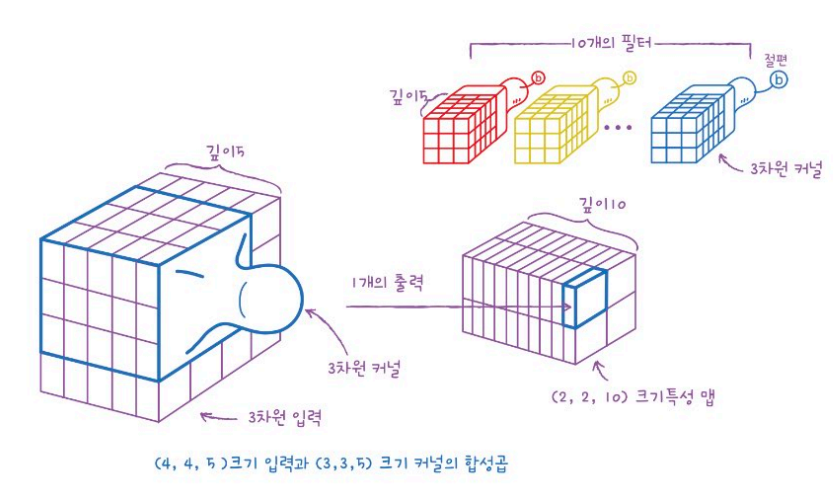

- 너비와 높이는 점점 줄고 깊이는 깊어지는 것이 특징


필터의 개수 많아질수록 다양하고 구체적인 특징 감지, 너비와 높이 차원을 줄여 특징이 이미지의 어느 위치에 높이더라도 쉽게 감지할 수 있도록 함

# 08-2

케라스 API를 이용해 CNN을 만들어 패션 MNIST이미지 분류하기

In [1]:
#데이터 불러오기
#2차원 이상 유지, Conv2D의 입력으로 들어가기 위해 깊이 지정(->1)

from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
#깊이 지정
train_scaled = train_input.reshape(-1, 28, 28, 1) /255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
#객체 생성
model = keras.Sequential()

#합성곱 층 추가 (입력 차원 지)
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

#풀링층 추가
model.add(keras.layers.MaxPooling2D(2))

#결과(14,14,32)

In [3]:
#두 번째 합성곱-풀링 층 추가
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

#풀링층 추가
model.add(keras.layers.MaxPooling2D(2))

#결과(7,7,64)

두 번째 합성곱의 입력크기가 (14, 14, 32)이므로 필터의 깊이도 32

In [4]:
#Flatten클래스, Dense은닉층, (dropout층), Dense출력층 추가
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

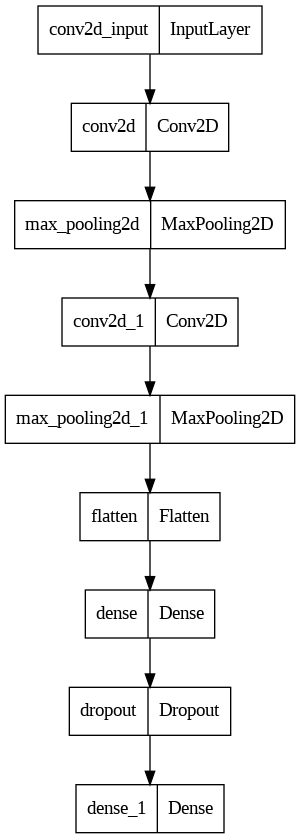

In [6]:
#그림으로 표현
keras.utils.plot_model(model)

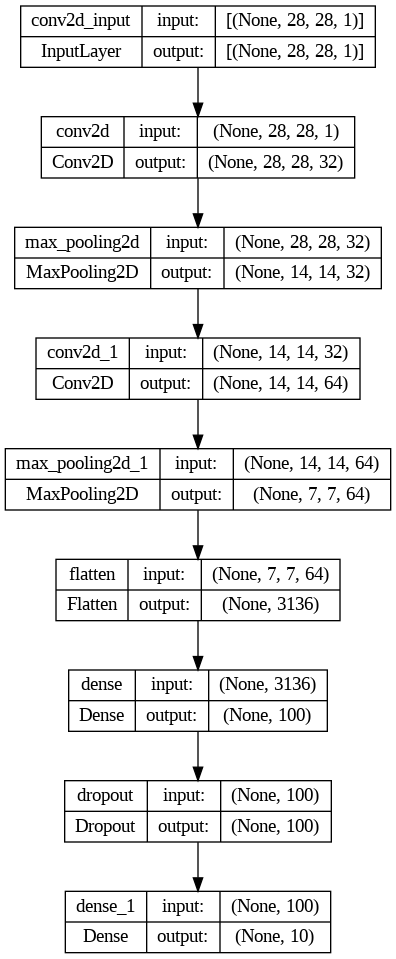

In [7]:
#입출력 크기 표시
keras.utils.plot_model(model, show_shapes = True)

In [8]:
#모델 컴파일 훈련
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-mocel.h5', save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 18s 5ms/step - loss: 0.5464 - accuracy: 0.8033 - val_loss: 0.3476 - val_accuracy: 0.8741
Epoch 2/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3611 - accuracy: 0.8708 - val_loss: 0.2909 - val_accuracy: 0.8958
Epoch 3/20
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3056 - accuracy: 0.8895 - val_loss: 0.2602 - val_accuracy: 0.9072
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2757 - accuracy: 0.9008 - val_loss: 0.2489 - val_accuracy: 0.9107
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2474 - accuracy: 0.9101 - val_loss: 0.2377 - val_accuracy: 0.9135
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2290 - accuracy: 0.9160 - val_loss: 0.2235 - val_accuracy: 0.9199
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2097 - accuracy: 0.9225 - val_loss: 0.2281 - val_accurac

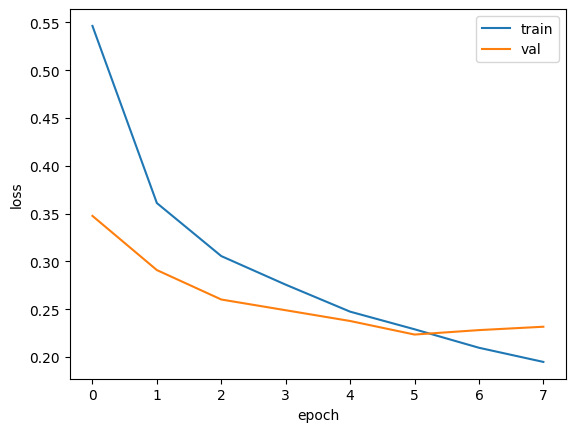

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 이전 완전밀집층과 비교했을 때 정확도 크게 증가
- epoch 6이 최적의 에포크
- restore_best_weights 가 True 이므로 model 객체가 최적의 모델 파라미터로 복원

In [10]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2235 - accuracy: 0.9199


[0.22349822521209717, 0.9199166893959045]

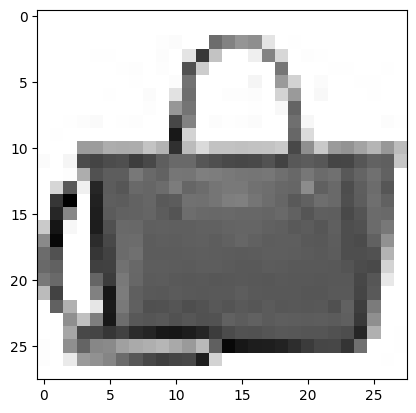

In [11]:
#예측
plt.imshow(val_scaled[0].reshape(28,28), cmap= 'gray_r')
plt.show()

In [12]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 150ms/step
[[5.4941210e-14 4.4328837e-18 7.6100041e-17 3.4190183e-14 7.0265283e-13
  3.7516244e-12 7.3242620e-14 4.8490071e-14 1.0000000e+00 8.1203507e-12]]


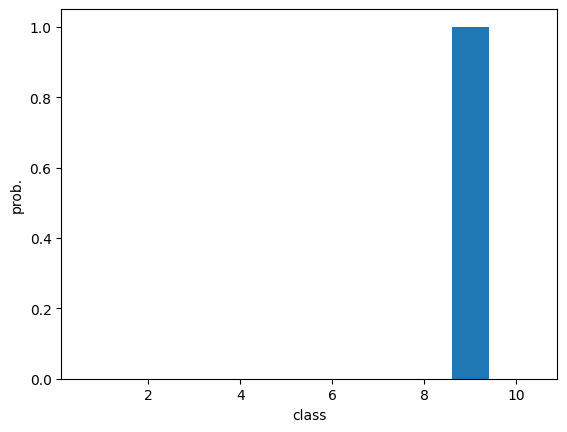

In [13]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [14]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [15]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [16]:
#테스트 셋 평가
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2419 - accuracy: 0.9122


[0.2419320046901703, 0.9121999740600586]

# CNN 시각화

**가중치 시각화**

- 가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현

ex) 둥근 모서리리에서 높은 출력값을 내는 필터
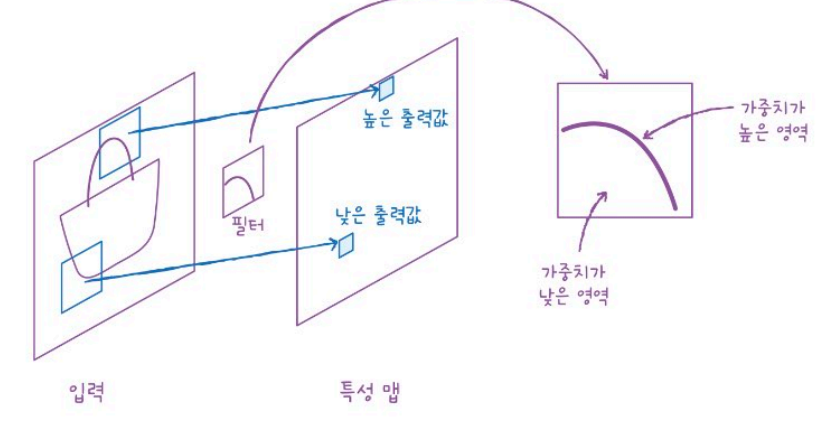

In [17]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [18]:
from tensorflow import keras

In [19]:
# 코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.h5 파일을 다운로드받아 사용하세요.
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

--2023-08-14 09:18:02--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2023-08-14 09:18:02--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4046712 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5’

best-cnn-model.h5   100%[===================>]   3.86M  --.-KB/s    in 0.07s   

2023-08-14 09:18:03 (56.4 MB/s) - ‘best-cnn-model.h5’ saved [4046712/4046712]



In [20]:
model = keras.models.load_model('best-cnn-model.h5')

In [21]:
model.layers

In [22]:
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [23]:
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.02494116 0.24951957


In [24]:
import matplotlib.pyplot as plt

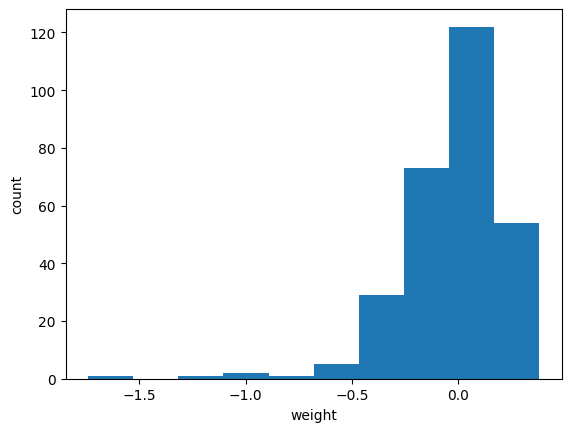

In [25]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

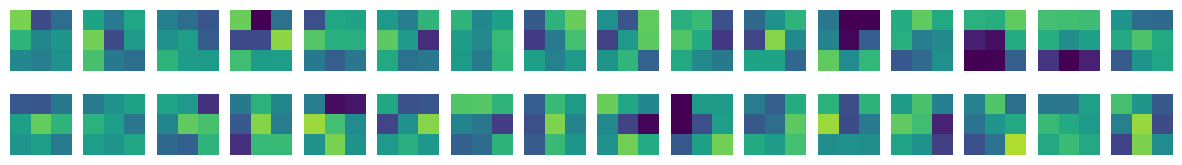

In [26]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [27]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

In [28]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [29]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

-0.010310263 0.0773888


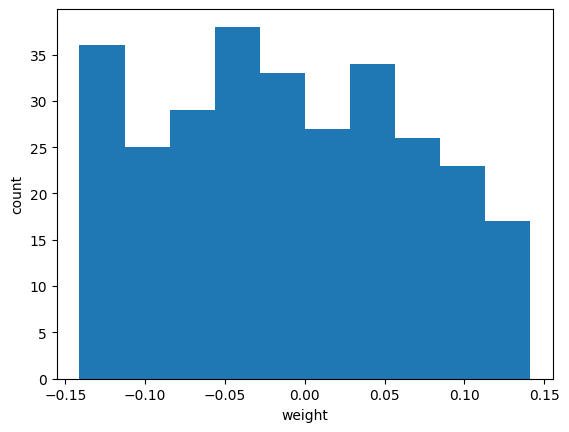

In [30]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

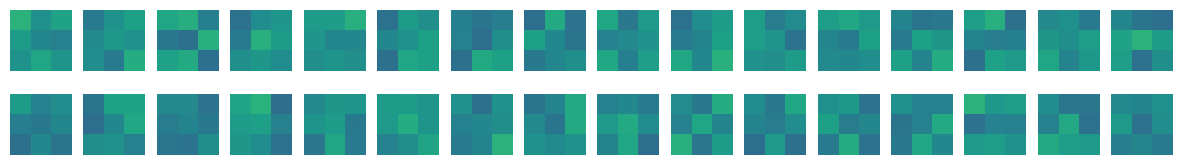

In [31]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

# 함수형 API

In [32]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [33]:
conv_acti = keras.Model(model.input, model.layers[0].output)

## 특성 맵 시각화

In [34]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

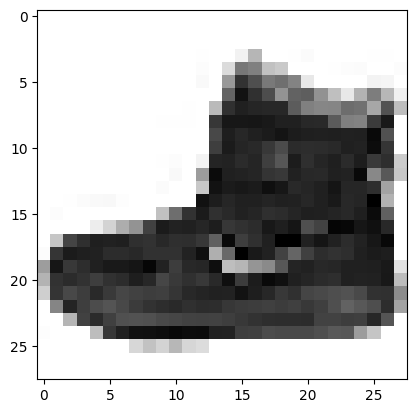

In [35]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [36]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 76ms/step


In [37]:
print(feature_maps.shape)

(1, 28, 28, 32)


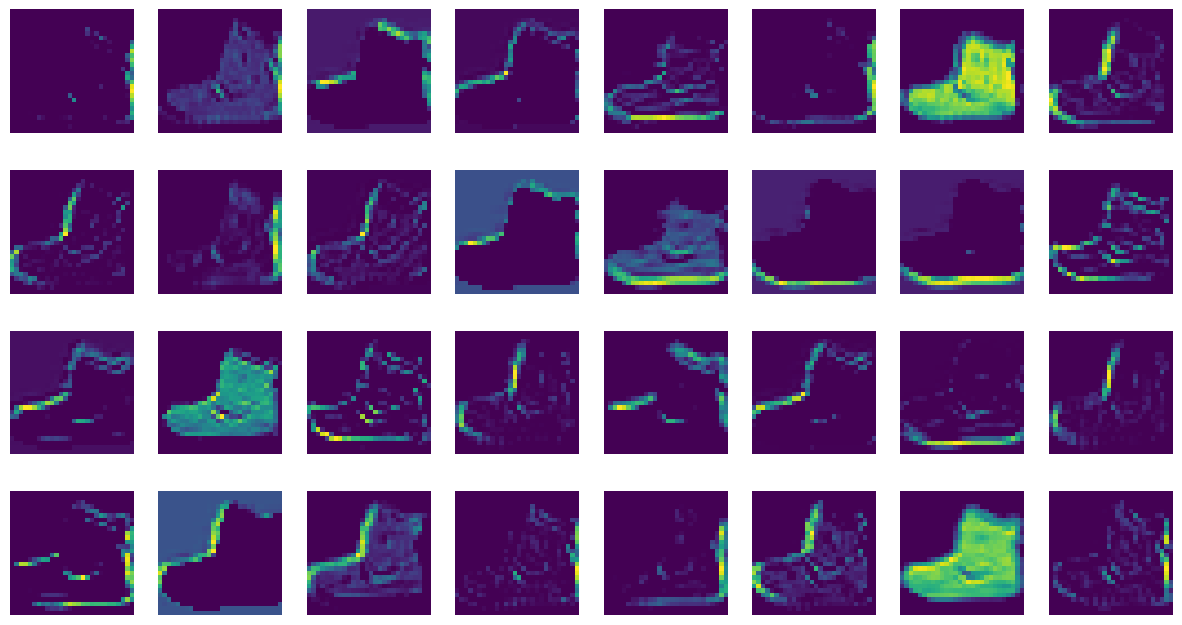

In [38]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [39]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [40]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

1/1 [==============================] - 0s 63ms/step


In [41]:
print(feature_maps.shape)

(1, 14, 14, 64)


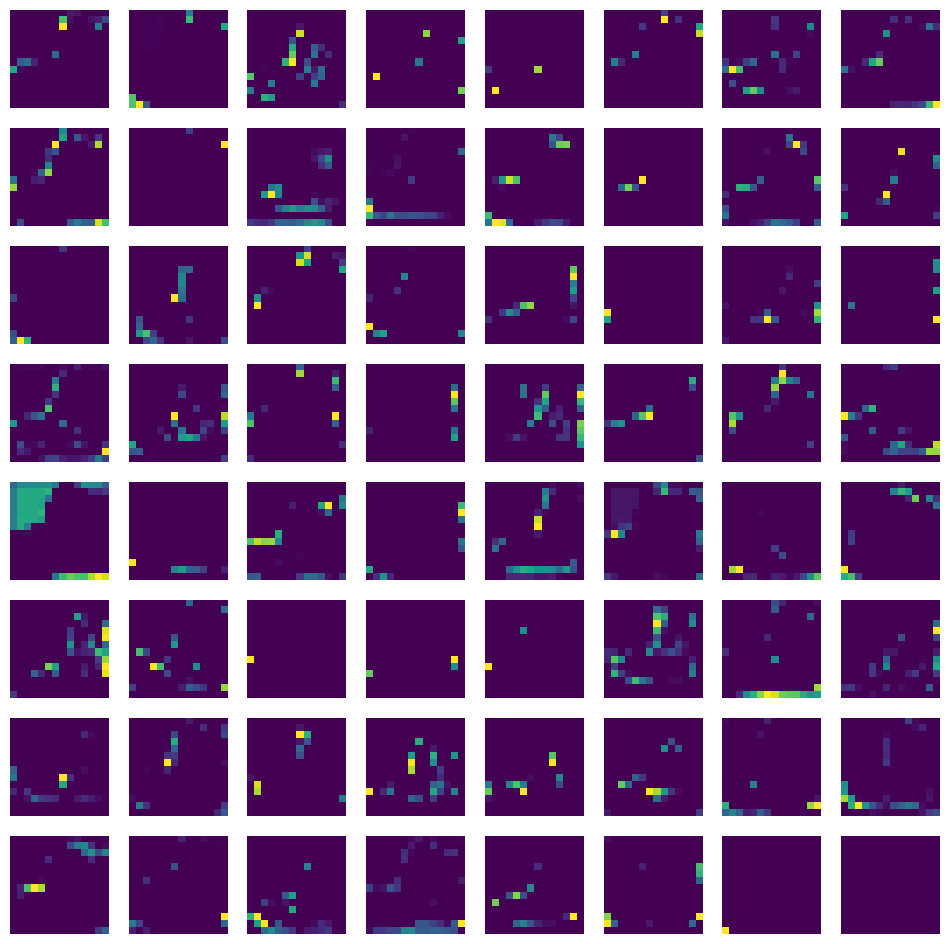

In [42]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()